In [2]:
# Change folder path
import os
os.chdir("/Users/yongganwu/repositories/machine_learning_exercise_claims")

# import
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import set_option

In [3]:
# Reading CSV file
#data = np.genfromtxt('claim.sample.csv', delimiter=',',dtype=None)
from pandas import read_csv
data = read_csv('claim.sample.csv',dtype='str')

In [4]:
# peak of data
print (data.shape)
#print (data.dtypes)
data.head(5)

(472559, 29)


,Unnamed: 0,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,...,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
0,1,28849991,1,9583423,FA0001411002,0002,0128,RR8I,,,...,15036.21,110,7763000,0,M,H,,02,P00000000002,FH001310QB01
1,2,81404290,1,25210465,FA0001411002,0001,0024,AL7I,,A0205,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
2,3,81404290,2,25210465,FA0001411002,0001,0128,RR8I,,,...,27525.263805,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
3,4,81404290,3,25210465,FA0001411002,0001,0250,AL7I,,,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
4,5,81404290,4,25210465,FA0001411002,0001,0258,AL7I,,,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1


In [17]:
# get sample data to work with
data = data[:5000]
print (data.shape)

(5000, 29)


In [18]:
# Statistical Summary
# Descriptive statistics can give you great insight into the shape of each attribute. Often you can
# create more summaries than you have time to review. The describe() function on the Pandas
# DataFrame lists 8 statistical properties of each attribute.
set_option('display.width', 100)
set_option('precision', 3)
print (data.describe())

       Unnamed: 0 Claim.Number Claim.Line.Number Member.ID   Provider.ID Line.Of.Business.ID  \
count        5000         3747              5000      5000          5000                5000   
unique       5000          415                63       375             3                   5   
top           658    902131490                 1  24922024  FA0001422001                0001   
freq            1           63               562       233          2510                2462   

       Revenue.Code Service.Code Place.Of.Service.Code Procedure.Code      ...       \
count          5000         5000                  5000           5000      ...        
unique           86           44                     2            284      ...        
top            0912         AL7I                                           ...        
freq            921         1320                  4999           2157      ...        

       Provider.Payment.Amount Group.Index Subscriber.Index Subgroup.Index Claim.Ty

In [19]:
# Class Distribution
# On classification problems you need to know how balanced the class values are. Highly imbalanced
# problems (a lot more observations for one class than another) are common and may need special
# handling in the data preparation stage of your project. You can quickly get an idea of the
# distribution of the class attribute in Pandas.
# print (data.groupby('Claim.Number').size())
for t in data.columns.values:
    print (data.groupby(t).size())

Unnamed: 0
1       1
10      1
100     1
1000    1
1001    1
1002    1
1003    1
1004    1
1005    1
1006    1
1007    1
1008    1
1009    1
101     1
1010    1
1011    1
1012    1
1013    1
1014    1
1015    1
1016    1
1017    1
1018    1
1019    1
102     1
1020    1
1021    1
1022    1
1023    1
1024    1
       ..
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
98      1
980     1
981     1
982     1
983     1
984     1
985     1
986     1
987     1
988     1
989     1
99      1
990     1
991     1
992     1
993     1
994     1
995     1
996     1
997     1
998     1
999     1
dtype: int64
Claim.Number
1004341490    12
1015050790     9
1015096190     9
1015096590     3
1015097990    18
1015098590    18
1015122590    15
1015144190    29
1015145190    29
1015154290     3
1015154291     3
1016677290    11
1016684290    11
1019952590     6
1019952591     7
1019993590     9
1025002890     6
103338990     14
103338991     14
1042929890     9
1050191290   

In [20]:
# Start update each columns
# Remove the first columns
# all code have to re-run from here if something is wrong
set_option("display.max_columns",30) 
d = data.drop('Unnamed: 0', 1)
print (d.shape)
d.head(5)

(5000, 28)


,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,...,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
0,28849991,1,9583423,FA0001411002,0002,0128,RR8I,,,V5789,...,15036.21,110,7763000,0,M,H,,02,P00000000002,FH001310QB01
1,81404290,1,25210465,FA0001411002,0001,0024,AL7I,,A0205,V5789,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
2,81404290,2,25210465,FA0001411002,0001,0128,RR8I,,,V5789,...,27525.263805,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
3,81404290,3,25210465,FA0001411002,0001,0250,AL7I,,,V5789,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
4,81404290,4,25210465,FA0001411002,0001,0258,AL7I,,,V5789,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1


In [8]:
# convert empty to nan value
# def empty_2_nan(cell):
#     c = str(cell).replace("\"","")
#     if c == ' ':
#         return np.nan
#     else:
#         return cell
# for c in d.columns.values:
#     d[c] = [empty_2_nan(i) for i in d[c]]
# d.head(5)

In [31]:
# Denial.Reason.Code
# function to clean Y value, replace " " with nan
y_negative = ["F13", "J8G", "JO5", "JB8", "JE1", "JC9", "JF1", "JF9", "JG1", "JPA", "JES"]
y_title = "Denial.Reason.Code"
y_title_new = "Denial.Reason.Code.new"
def clean_y(cell):
    cell = str(cell).replace("\"","")
    if cell in y_negative:
        return 1
    else:
        if cell == ' ':
            return np.nan
        else:
            return 0
cell = d[y_title][0]
print (cell)
clean_y(cell)
d[y_title_new] = [clean_y(i) for i in d[y_title]]
d[y_title_new].head(10)

0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
5    0.0
6    NaN
7    NaN
8    NaN
9    NaN
Name: Denial.Reason.Code.new, dtype: float64

In [34]:
# remove not wanted rows
# need to do this first, because it might affect final analysis result
set_option("display.max_columns",30) 
d_sub=d[~np.isnan(d[y_title_new])]
print (d_sub.shape)
d_sub.head(5)

(1736, 29)


,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,Denial.Reason.Code.new
2,81404290,2,25210465,FA0001411002,0001,0128,RR8I,,,V5789,27099.744,PAI,A,I,N,N,N,0,27525.263805,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1,0.0
5,81404290,5,25210465,FA0001411002,0001,0259,AL7I,,,V5789,1081.39731,F05,A,I,V,N,N,0,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1,0.0
21,84816790,1,25210465,FA0001411002,0001,0024,AL7I,,A0205,V5789,0,JA,,I,N,N,N,0,0,110,20421600,0,M,H,,02,P00000000007,FH001310QB01,0.0
22,84816790,5,25210465,FA0001411002,0001,0259,AL7I,,,V5789,1081.39731,JA,,I,N,N,N,0,0,110,20421600,0,M,H,,02,P00000000007,FH001310QB01,0.0
23,84816790,2,25210465,FA0001411002,0001,0128,RR8I,,,V5789,27099.744,JA,,I,N,N,N,0,0,110,20421600,0,M,H,,02,P00000000007,FH001310QB01,0.0


In [35]:
# get dummmies for category
names_cat = [
    "Claim.Number",
    "Claim.Line.Number",
    "Member.ID",
    "Line.Of.Business.ID",
    "Provider.ID",
    "Revenue.Code",
    "Service.Code",
    "Place.Of.Service.Code",
    "Procedure.Code",
    "Diagnosis.Code",
    "Price.Index",
    "In.Out.Of.Network",
    "Reference.Index",
    "Pricing.Index",
    "Capitation.Index",
    "Claim.Type",
    "Claim.Subscriber.Type",
    "Claim.Pre.Prince.Index",
    "Network.ID",
    "Agreement.ID",
    "Subgroup.Index",
    "Subscriber.Index",
    "Group.Index",
    "Claim.Current.Status",
    ]

def empty_2_nan(cell):
    cell = str(cell).replace("\"","")
    if cell == ' ':
        return np.nan
    else:
        return cell

d_dum = d_sub
print (d_dum.shape)
for c in names_cat:
    print (c)
    v = [empty_2_nan(i) for i in d_sub[c]]
    dum = pd.get_dummies(v,prefix=c+".new")
    #print (dum.head(5))
    dum.index = d_dum.index
    d_dum = pd.concat([d_dum,dum],axis=1)
    print (d_dum.shape)

(1736, 29)
Claim.Number
(1736, 419)
Claim.Line.Number
(1736, 482)
Member.ID
(1736, 715)
Line.Of.Business.ID
(1736, 719)
Provider.ID
(1736, 722)
Revenue.Code
(1736, 779)
Service.Code
(1736, 811)
Place.Of.Service.Code
(1736, 812)
Procedure.Code
(1736, 954)
Diagnosis.Code
(1736, 1068)
Price.Index
(1736, 1070)
In.Out.Of.Network
(1736, 1072)
Reference.Index
(1736, 1075)
Pricing.Index
(1736, 1078)
Capitation.Index
(1736, 1080)
Claim.Type
(1736, 1081)
Claim.Subscriber.Type
(1736, 1083)
Claim.Pre.Prince.Index
(1736, 1085)
Network.ID
(1736, 1091)
Agreement.ID
(1736, 1099)
Subgroup.Index
(1736, 1127)
Subscriber.Index
(1736, 1359)
Group.Index
(1736, 1390)
Claim.Current.Status
(1736, 1395)


In [ ]:
# category to label
# from sklearn import preprocessing
# le = {}
# for c in [
#     "Provider.ID",
#     "Revenue.Code",
#     "Service.Code",
#     "Procedure.Code",
#     "Diagnosis.Code",
#     "Price.Index",
#     "In.Out.Of.Network",
#     "Reference.Index",
#     "Pricing.Index",
#     "Capitation.Index",
#     "Claim.Type",
#     "Claim.Subscriber.Type",
#     "Claim.Pre.Prince.Index",
#     "Network.ID",
#     "Agreement.ID",
#     ]:
#     print ("%s.new" % c)
#     le[c] = preprocessing.LabelEncoder()
#     le[c].fit(d[c])
#     d["%s.new" % c]=le[c].transform(d[c])
#     print (d["%s.new" % c][:10])
# d.head(5)

In [36]:
# number to number
names_num = [
    "Subscriber.Payment.Amount",
    "Provider.Payment.Amount",
    "Claim.Current.Status",
]

def cell_2_float(cell):
    cell = str(cell).replace("\"","")
    if cell == ' ':
        return np.nan
    else:
        return float(cell)

for c in names_num:
    d_dum["%s.new" % c] = [cell_2_float(i) for i in d_dum[c]]
    print (d_dum["%s.new" % c][:2])


2    0.0
5    0.0
Name: Subscriber.Payment.Amount.new, dtype: float64
2    27525.264
5        0.000
Name: Provider.Payment.Amount.new, dtype: float64
2    91.0
5    91.0
Name: Claim.Current.Status.new, dtype: float64


In [37]:
# Extract newly extracted data
d_col = d_dum
for c in d_col.columns.values:
    if c.find("new") == -1:
        d_col.drop(c, 1, inplace=True)
print (d_col.shape)

(1736, 1370)


In [41]:
# Skew for each attribute
# Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
# squashed in one direction or another. Many machine learning algorithms assume a Gaussian
# distribution. Knowing that an attribute has a skew may allow you to perform data preparation
# to correct the skew and later improve the accuracy of your models. You can calculate the skew
# of each attribute using the skew() function on the Pandas DataFrame.
names_num_new = [n+'.new' for n in names_num]
d_skew = d_col[names_num_new].skew()
print (len(d_skew[abs(d_skew) > 2]))
print (d_skew[abs(d_skew) > 2])

# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

# Need to normalized the data

3
Subscriber.Payment.Amount.new    41.566
Provider.Payment.Amount.new       8.812
Claim.Current.Status.new          2.913
dtype: float64


In [42]:
# Normalization
# Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any 
# pair of samples.
# A lot of process need normalization to be correct

d_norm = d_col.copy()
normalizer = preprocessing.Normalizer().fit(d_col[names_num_new])

d_norm[names_num_new] = normalizer.transform(d_col[names_num_new])
d_norm[names_num_new].head(5)

,Subscriber.Payment.Amount.new,Provider.Payment.Amount.new,Claim.Current.Status.new
2,0.0,1.0,0.003
5,0.0,0.0,1.000
21,0.0,0.0,1.000
22,0.0,0.0,1.000
23,0.0,0.0,1.000


In [45]:
# Correlations Between Attributes
# Correlation refers to the relationship between two variables and how they may or may not
# change together. The most common method for calculating correlation is Pearson’s Correlation
# Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1
# or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
# correlation at all. Some machine learning algorithms like linear and logistic regression can suffer
# poor performance if there are highly correlated attributes in your dataset. As such, it is a good
# idea to review all of the pairwise correlations of the attributes in your dataset. You can use the
# corr() function on the Pandas DataFrame to calculate a correlation matrix.
set_option("display.max_columns",30) 
set_option('display.width', 100)
set_option('precision', 3)
d_corr = d_norm.corr(method='pearson')

# Capitation.Index.new, Claim.Pre.Prince.Index.new
# Member.ID.new, Subscriber.Index.new

# need to reduce the dimension

In [66]:
# get the highly corelated attributes
print (d_corr.shape)

for c in d_corr.columns:
    if len(d_corr[abs(d_corr[c]) > 0.9]) > 1:
        print (d_corr.index[abs(d_corr[c]) > 0.9])


(1370, 1370)
Index(['Claim.Number.new_1004341490', 'Member.ID.new_46521144', 'Subscriber.Index.new_37684200'], dtype='object')
Index(['Claim.Number.new_1015050790', 'Member.ID.new_2334316', 'Subscriber.Index.new_1890900'], dtype='object')
Index(['Claim.Number.new_1019993590', 'Member.ID.new_19965077', 'Diagnosis.Code.new_30440',
       'Subgroup.Index.new_918', 'Subscriber.Index.new_16172600', 'Group.Index.new_565'],
      dtype='object')
Index(['Claim.Number.new_103338991', 'Member.ID.new_1993286', 'Subscriber.Index.new_1614650'], dtype='object')
Index(['Claim.Number.new_1042929890', 'Member.ID.new_30509926', 'Subscriber.Index.new_24714400'], dtype='object')
Index(['Claim.Number.new_1060634190', 'Member.ID.new_41908003', 'Subscriber.Index.new_33947350'], dtype='object')
Index(['Claim.Number.new_106152690', 'Member.ID.new_2355735', 'Subscriber.Index.new_1908250'], dtype='object')
Index(['Claim.Number.new_1071084090', 'Member.ID.new_43178921', 'Subscriber.Index.new_34976850'], dtype='ob

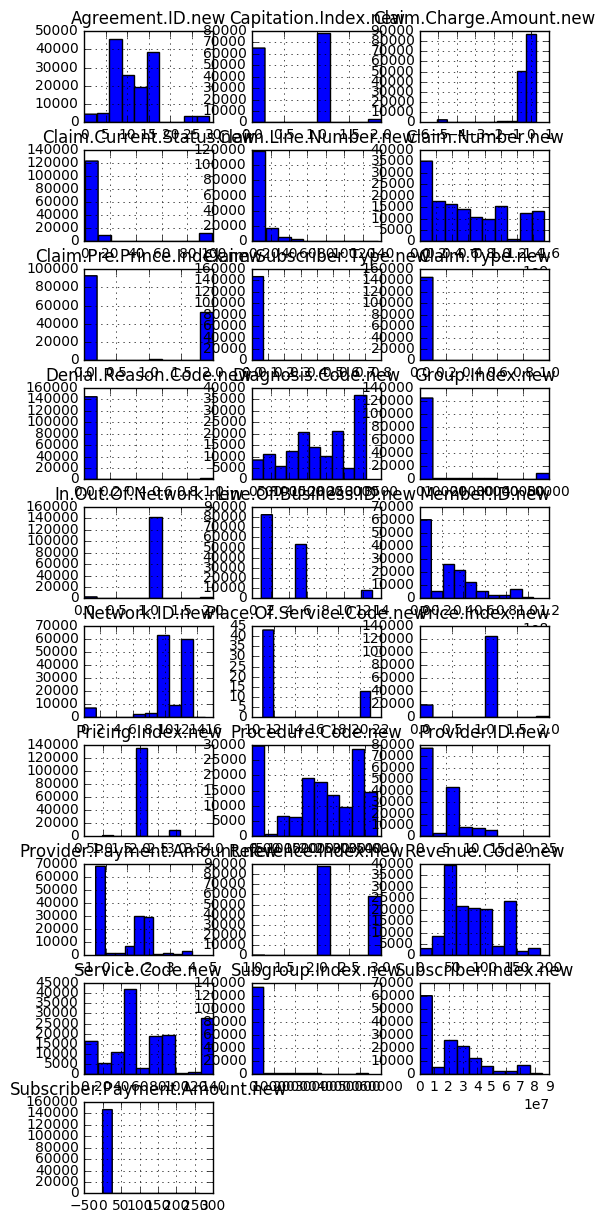

In [267]:
# Univariate Histograms
# A fast way to get an idea of the distribution of each attribute is to look at histograms.
# Histograms group data into bins and provide you a count of the number of observations in each bin. 
# From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian’, 
# skewed or even has an exponential distribution. It can also help you see possible outliers.

import matplotlib.pyplot as plt
DATA_norm.hist(layout=(10,3),figsize=(6, 15))
plt.show()

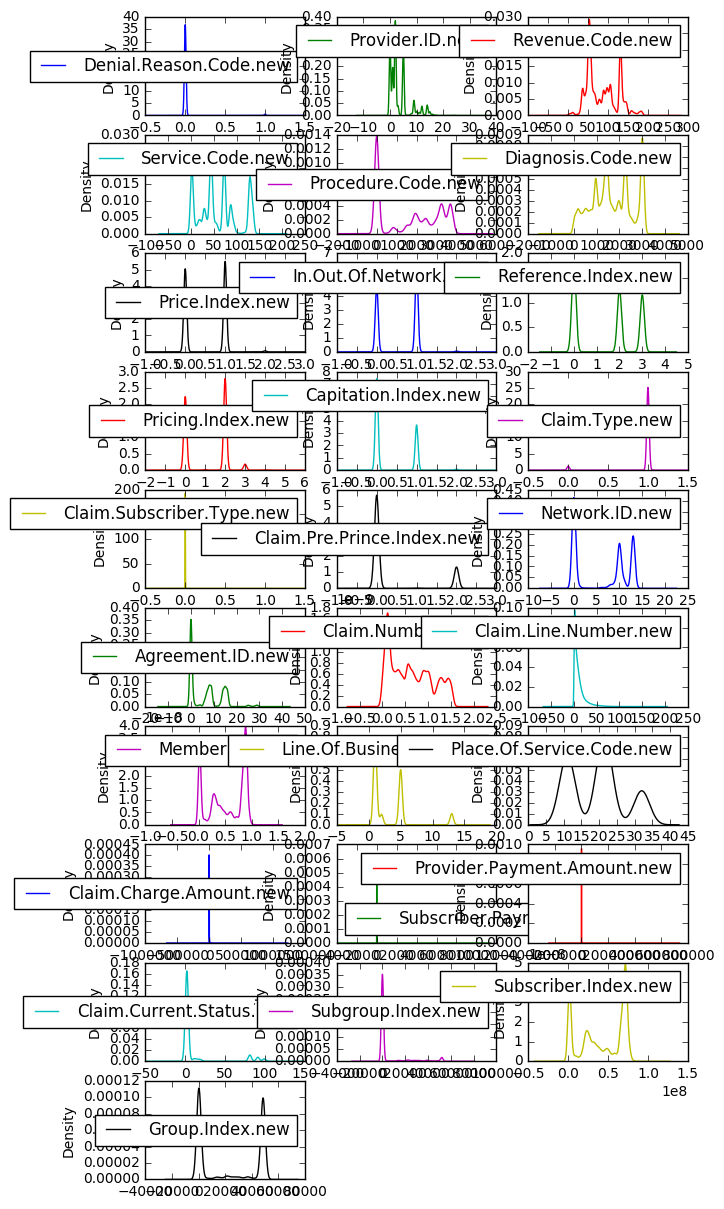

In [200]:
# Density Plots
# Density plots are another way of getting a quick idea of the distribution of each attribute. 
# The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, 
# much like your eye tried to do with the histograms.
DATA_norm.plot(kind='density', subplots=True, layout=(10,3), sharex=False ,figsize=(7, 15))
plt.show()

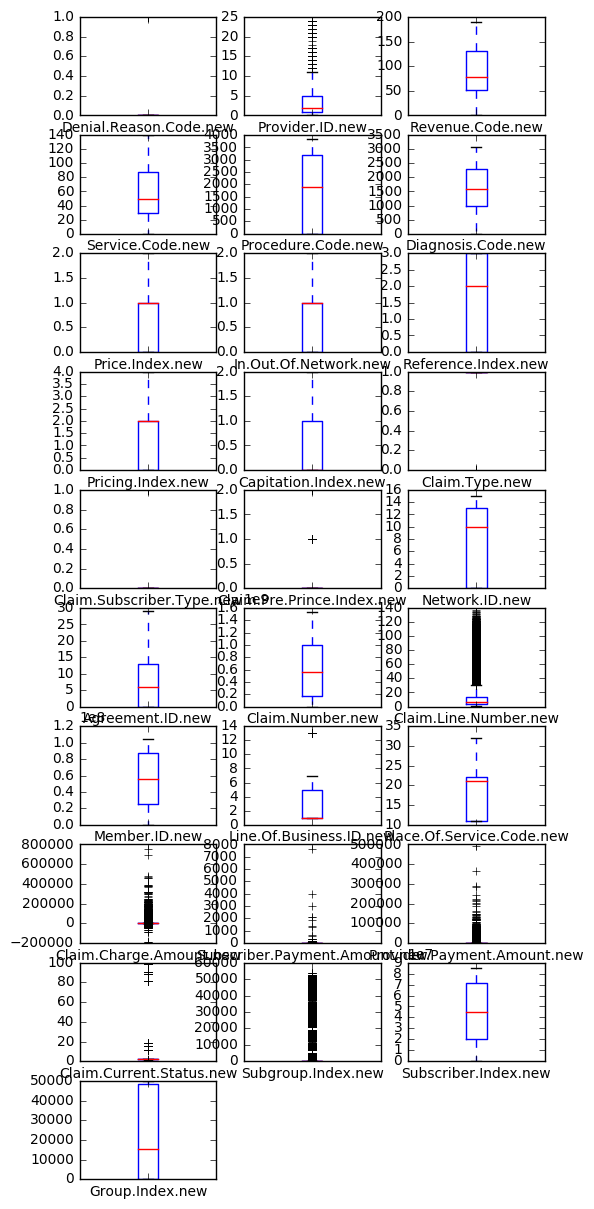

In [199]:
# Box and Whisker Plots

# Another useful way to review the distribution of each attribute is to use Box and Whisker Plots 
# or boxplots for short.

# Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) 
# and a box around the 25th and 75th percentiles (the middle 50% of the data). 
# The whiskers give an idea of the spread of the data and dots outside of the whiskers show 
# candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

DATA_norm.plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False ,figsize=(6, 15))
plt.show()

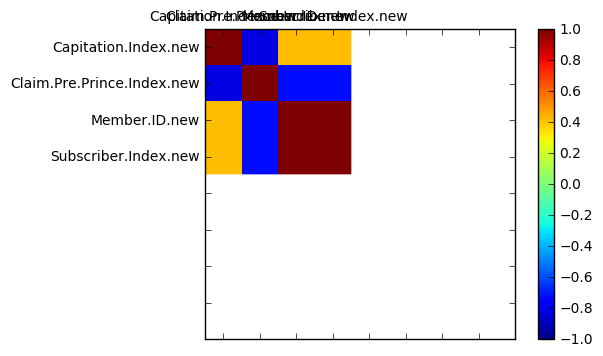

In [312]:
# Correlation Matrix Plot

# Correlation gives an indication of how related the changes are between two variables. 
# If two variables change in the same direction they are positively correlated. If the change in opposite 
# directions together (one goes up, one goes down), then they are negatively correlated.

# You can calculate the correlation between each pair of attributes. This is called a correlation matrix. 
# You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

# This is useful to know, because some machine learning algorithms like linear and logistic regression 
# can have poor performance if there are highly correlated input variables in your data.

names = ['Capitation.Index.new', 'Claim.Pre.Prince.Index.new','Member.ID.new', 'Subscriber.Index.new']
correlations = DATA_norm[names].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# only keep one of the corelated fields, check the null value

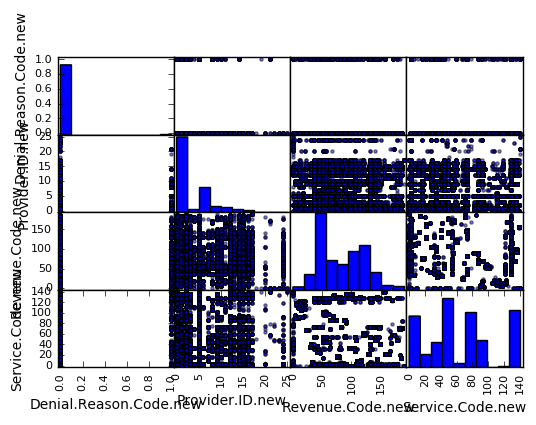

In [215]:
# Scatterplot Matrix

# A scatterplot shows the relationship between two variables as dots in two dimensions, 
# one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. 
# Drawing all these scatterplots together is called a scatterplot matrix.

# Scatter plots are useful for spotting structured relationships between variables, like whether you could 
# summarize the relationship between two variables with a line. Attributes with structured relationships 
# may also be correlated and good candidates for removal from your dataset.

names = ["Denial.Reason.Code.new","Provider.ID.new","Revenue.Code.new","Service.Code.new","Procedure.Code.new","Diagnosis.Code.new",
    "Price.Index.new","In.Out.Of.Network.new","Reference.Index.new","Pricing.Index.new","Capitation.Index.new",
    "Claim.Type.new","Claim.Subscriber.Type.new","Claim.Pre.Prince.Index.new","Network.ID.new",
    "Agreement.ID.new"]
# names = ["Denial.Reason.Code.new","Provider.ID.new","Revenue.Code.new","Service.Code.new"]
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DATA[names])
plt.show()

In [72]:
# Missing Values Ratio
# For feature selection
print (len(d_norm))
for c in d_norm.columns.values:
    r = np.count_nonzero(np.isnan(d_norm[c]))/len(d_norm)
    if r > 0.01:
        print ("%s: %s" % (c, r))

1736


In [315]:
# Place.Of.Service.Code.new have to be removed because of too much nan
DATA_norm = DATA_norm.drop('Place.Of.Service.Code.new', 1)

# High Correlation Filter.
# one of following have to be removed because highly corelated
# Capitation.Index.new, Claim.Pre.Prince.Index.new
# Member.ID.new, Subscriber.Index.new
DATA_norm = DATA_norm.drop('Claim.Pre.Prince.Index.new', 1)
DATA_norm = DATA_norm.drop('Subscriber.Index.new', 1)
print (DATA_norm.shape)

ValueError: labels ['Place.Of.Service.Code.new'] not contained in axis

In [75]:
# Low Variance Filter.

d_var = np.var(d_norm)

print (d_var[d_var > 0.03])

Claim.Number.new_1004341490      1.151e-03
Claim.Number.new_1015050790      1.151e-03
Claim.Number.new_1015096190      5.757e-04
Claim.Number.new_1015096590      1.725e-03
Claim.Number.new_1015097990      1.026e-02
Claim.Number.new_1015098590      5.757e-04
Claim.Number.new_1015122590      5.757e-04
Claim.Number.new_1015144190      5.757e-04
Claim.Number.new_1015145190      1.643e-02
Claim.Number.new_1015154290      5.757e-04
Claim.Number.new_1015154291      5.757e-04
Claim.Number.new_1016677290      6.296e-03
Claim.Number.new_1016684290      1.151e-03
Claim.Number.new_1019952590      3.444e-03
Claim.Number.new_1019952591      5.757e-04
Claim.Number.new_1019993590      5.157e-03
Claim.Number.new_1025002890      5.757e-04
Claim.Number.new_103338990       5.757e-04
Claim.Number.new_103338991       7.999e-03
Claim.Number.new_1042929890      5.757e-04
Claim.Number.new_1050191290      5.757e-04
Claim.Number.new_1050205290      5.157e-03
Claim.Number.new_1060634190      2.872e-03
Claim.Numbe

In [320]:
# find out disting values for each column
# select those fields have huge differences, use this method to reduce the dimension
names = ["Provider.ID.new","Revenue.Code.new","Service.Code.new","Procedure.Code.new","Diagnosis.Code.new",
    "Price.Index.new","In.Out.Of.Network.new","Reference.Index.new","Pricing.Index.new","Capitation.Index.new",
    "Claim.Type.new","Claim.Subscriber.Type.new","Network.ID.new",
    "Agreement.ID.new"]
#print (DATA[names].head(2))
#print (DATA["Denial.Reason.Code.new"][[DATA["Denial.Reason.Code.new"]==1][0]])
D1 = DATA_norm[names][[DATA_norm["Denial.Reason.Code.new"]==1][0]]
D2 = DATA_norm[names][[DATA_norm["Denial.Reason.Code.new"]==0][0]]
for t in names:
    print (t)
    print ("%s/%s" % (len(D1[t].unique()),len(D1)))
    print ("%s/%s" % (len(D2[t].unique()), len(D2)))
    
# these 3 fields need to be investigated
# Procedure.Code.new, Diagnosis.Code.new, Claim.Type.new

Provider.ID.new
13/1971
25/144558
Revenue.Code.new
90/1971
159/144558
Service.Code.new
48/1971
111/144558
Procedure.Code.new
129/1971
2912/144558
Diagnosis.Code.new
297/1971
2500/144558
Price.Index.new
2/1971
3/144558
In.Out.Of.Network.new
2/1971
3/144558
Reference.Index.new
3/1971
3/144558
Pricing.Index.new
4/1971
4/144558
Capitation.Index.new
2/1971
3/144558
Claim.Type.new
747/1971
40569/144558
Claim.Subscriber.Type.new
21/1971
28/144558
Network.ID.new
7/1971
16/144558
Agreement.ID.new
12/1971
28/144558


In [76]:
# Scaling features to a range

scaler = preprocessing.StandardScaler().fit(d_norm[names_num_new])
d_scale = d_norm
d_scale[names_num_new] = scaler.transform(d_norm[names_num_new])
d_scale[names_num_new].head(5)

,Subscriber.Payment.Amount.new,Provider.Payment.Amount.new,Claim.Current.Status.new
2,-0.034,1.735,-1.755
5,-0.034,-0.579,0.578
21,-0.034,-0.579,0.578
22,-0.034,-0.579,0.578
23,-0.034,-0.579,0.578


In [323]:
# Encoding categorical features


        0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  \
2        0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5        0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
21       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
22       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
23       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
25       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28       0   0   0  